# **Milestone 2**

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like - Name 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

In [152]:
#Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#for tuning the model
from sklearn.model_selection import GridSearchCV


#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

In [153]:
cars_data = pd.read_csv("..\\..\\Public_Datasets\\used_cars_milestone_1.csv")

In [154]:
# drop observations missing the dependent values 
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7252 non-null   int64  
 1   Name                   7252 non-null   object 
 2   Location               7252 non-null   object 
 3   Year                   7252 non-null   int64  
 4   Kilometers_Driven      7252 non-null   int64  
 5   Fuel_Type              7252 non-null   object 
 6   Transmission           7252 non-null   object 
 7   Owner_Type             7252 non-null   object 
 8   Mileage                7252 non-null   float64
 9   Engine                 7252 non-null   float64
 10  Power                  7252 non-null   float64
 11  Seats                  7252 non-null   float64
 12  New_price              7252 non-null   float64
 13  Price                  6018 non-null   float64
 14  kilometers_driven_log  7252 non-null   float64
 15  pric

There are 6,018 observations with dependent values that are not null.

In [155]:
cars_data.dropna(inplace=True)

### **Split Data**

<li>Step1: Split the data into X and Y . 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

<b>Think about it:</b> Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [156]:
# Step-1
y = cars_data[['Price', 'price_log']]
X = cars_data.drop(['Unnamed: 0', 'Model', 'Name', 'Price', 'price_log', 'Kilometers_Driven'],axis=1)


In [157]:
# Step-2 Use pd.get_dummies(drop_first=True)
X = pd.get_dummies(X, drop_first=True)

In [158]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape, X_test.shape)

(4212, 55) (1806, 55)


In [159]:
X_train.columns

Index(['Year', 'Mileage', 'Engine', 'Power', 'Seats', 'New_price',
       'kilometers_driven_log', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini',
       'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz',
       'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche',
       'Brand_Renault', 'Brand_Skoda', 'Brand_Smart', 'Brand_Tata',
       'Brand

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### Function to score RMSE and R^2 for model(s) 


In [160]:
# Let us write a function for calculating r2_score and RMSE on train and test data.
# This function takes model as an input on which we have trained particular algorithm.
# the categorical column as the input and returns the boxplots and histograms for the variable.
def get_model_score(model, flag = True):
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train['price_log'], pred_train)
    test_r2=metrics.r2_score(y_test['price_log'], pred_test)
    train_rmse=metrics.mean_squared_error(y_train['price_log'], pred_train, squared=False)
    test_rmse=metrics.mean_squared_error(y_test['price_log'], pred_test, squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-square on training set : ",metrics.r2_score(y_train['price_log'], pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test['price_log'], pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train['price_log'], pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test['price_log'], pred_test)))
    
    # returning the list with train and test scores
    return score_list

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [161]:
# Create a linear regression model
lr = LinearRegression()       

In [162]:
# Fit linear regression model
lr.fit(X_train, y_train['price_log']) 

LinearRegression()

In [163]:
s = get_model_score(lr)

R-square on training set :  0.9220761555103346
R-square on test set :  0.9289744972358779
RMSE on training set :  0.24316006313787522
RMSE on test set :  0.23421432054767066


#### **Observations from results: **

The R-square values is ~0.92 so the independent variables explain the variance in the dependent variable well. The MSE on the training and test datasets are very close so the model is fitted well. 

#### **Important variables of Linear Regression**

Building a model using statsmodels

In [164]:
# Add constant for test and train
x_train = sm.add_constant(X_train)
x_test = sm.add_constant(X_test)


In [165]:

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)
olsmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     894.1
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:26:48   Log-Likelihood:                -20.652
No. Observations:                4212   AIC:                             153.3
Df Residuals:                    4156   BIC:                             508.7
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -241.0305      3.430    -70.280      0.000    -247.754    -234.307
Year                          0.1207      0.002     71.354      0.000       0.117       0.124
Mileage                      -0.0170      0.002     -9.502      0.000      -0.020      -0.013
Engine                        0.0002   2.01e-05      8.495      0.000       0.000       0.000
Power                         0.0046      0.000     21.297      0.000       0.004       0.005
Seats                         0.0375      0.007      5.051      0.000       0.023       0.052
New_price                    -0.0003      0.000     -0.654      0.513      -0.001       0.001
kilometers_driven_log        -0.0642      0.007     -9.049      0.000      -0.078      -0.050
Location_Bangalore            0.1711      0.025      6.917      0.000       0.123       0.220
Location_Chennai              0.0205      0.023      0.874      0.382      -0.026       0.067
Location_Coimbatore           0.1040      0.022      4.623      0.000       0.060       0.148
Location_Delhi               -0.0528      0.023     -2.310      0.021      -0.098      -0.008
Location_Hyderabad            0.1080      0.022      4.928      0.000       0.065       0.151
Location_Jaipur              -0.0688      0.024     -2.854      0.004      -0.116      -0.022
Location_Kochi               -0.0291      0.023     -1.289      0.198      -0.073       0.015
Location_Kolkata             -0.2379      0.023    -10.308      0.000      -0.283      -0.193
Location_Mumbai              -0.0348      0.022     -1.585      0.113      -0.078       0.008
Location_Pune                -0.0371      0.023     -1.643      0.100      -0.081       0.007
Fuel_Type_Diesel              0.2099      0.041      5.130      0.000       0.130       0.290
Fuel_Type_Electric            1.0492      0.249      4.210      0.000       0.561       1.538
Fuel_Type_LPG                -0.1138      0.102     -1.116      0.264      -0.314       0.086
Fuel_Type_Petrol             -0.0880      0.042     -2.090      0.037      -0.171      -0.005
Transmission_Manual          -0.1146      0.013     -9.113      0.000      -0.139      -0.090
Owner_Type_Fourth & Above     0.0109      0.110      0.098      0.922      -0.205       0.227
Owner_Type_Second            -0.0593      0.011     -5.351      0.000      -0.081      -0.038
Owner_Type_Third             -0.1252      0.029     -4.376      0.000      -0.181      -0.069
Brand_Audi                    0.4990      0.249      2.008      0.045       0.012       0.986
Brand_BMW                     0.4748      0.249      1.910      0.056      -0.013       0.962
Brand_Bentley                 0.1841      0.355      0.518      0.604      -0.513       0.881
Brand_Chevrolet              -0.4325      0.248     -1.741      0.082      

In [166]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns=['coef'])
olsmod['pval']=olsmodel1.pvalues

In [167]:
# FIlter by significant p-value (pval <0.05) and sort descending by Odds ratio
olsmod = olsmod.sort_values(by="pval", ascending=False)
pval_filter = olsmod['pval']<=0.05
olsmod[pval_filter]

,coef,pval
Brand_Audi,0.498965,4.475067e-02
Fuel_Type_Petrol,-0.088031,3.667135e-02
Brand_Mercedes-Benz,0.521797,3.564407e-02
Location_Delhi,-0.052826,2.094388e-02
Brand_Datsun,-0.605687,2.033109e-02
Brand_Tata,-0.652696,8.529849e-03
Location_Jaipur,-0.068803,4.339222e-03
Brand_Land,0.812845,1.199353e-03
Brand_Mini,0.944890,2.104925e-04
Fuel_Type_Electric,1.049177,2.603229e-05


In [168]:
# we are looking are overall significant varaible
pval_filter = olsmod['pval']<=0.05
imp_vars = olsmod[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in cars_data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print(start+'Most overall significant categorical varaibles of LINEAR REGRESSION  are '+end,':\n',sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Brand', 'Fuel_Type', 'Location', 'Owner_Type', 'Seats', 'Engine', 'kilometers_driven_log', 'Transmission', 'Mileage', 'Power', 'Year']


<b>Build Ridge / Lasso Regression similar to Linear Regression:</b><br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [169]:
from sklearn.linear_model import Ridge

In [170]:
# Create a Ridge regression model
ridge = Ridge()
ridge.fit(X_train, y_train['price_log'])

s = get_model_score(ridge)

R-square on training set :  0.9218814027356841
R-square on test set :  0.9286527530562163
RMSE on training set :  0.24346373491692141
RMSE on test set :  0.23474421433722897


# Observations

We built three different linear regression models and all three had very similar results. The linear model is giving good generalized performance. The validation set performed well and the model is successful in making predictions.

The R-squared metric gives us an indication that how good/bad our model is from a baseline model. Here, we have explained ~92% variance in the data as compared to the baseline model when there is no independent variable.



### **Decision Tree** 

[Scikit Regression Tree](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

In [171]:
# Create a decision tree regression model
dtree = DecisionTreeRegressor(random_state=1)

In [172]:
# Fit decision tree regression model.
dtree.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(random_state=1)

In [173]:
# Get score of the model on validation set.
s = get_model_score(dtree)


R-square on training set :  0.9999903038539666
R-square on test set :  0.8803331621453185
RMSE on training set :  0.002712418113189585
RMSE on test set :  0.3040137278931398


#### **Observations from results: **

The R^2 value is much lower than linear regression on the validation set. 

Print the importance of features in the tree building ( The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )


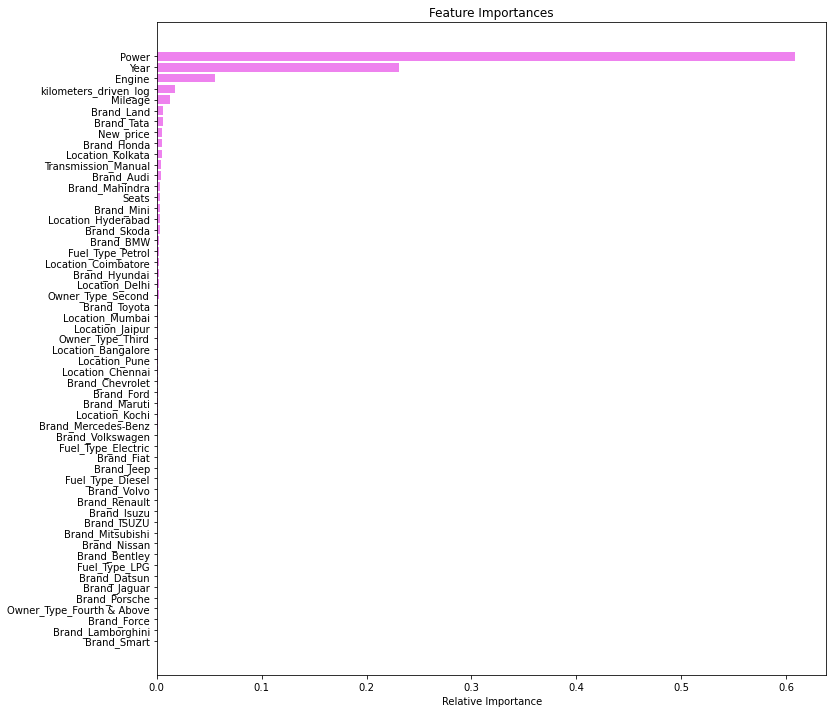

In [174]:
# Print important features similar to decision trees
importances = dtree.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### **Random Forest**

[Scikit Regression for Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [175]:
# Create a Randomforest regression model 
rf = RandomForestRegressor(random_state=1)

# Fit Randomforest regression model.
rf.fit(X_train, y_train['price_log'])

RandomForestRegressor(random_state=1)

In [176]:
# Get score of the model.
s = get_model_score(rf)

R-square on training set :  0.9904075631819222
R-square on test set :  0.9429677770701312
RMSE on training set :  0.08531424183391467
RMSE on test set :  0.20987776799333377


#### **Observations and insights: **

The R^2 value for the random forest regressor is a little higher than linear regression on the validation set. 

**Feature Importance**

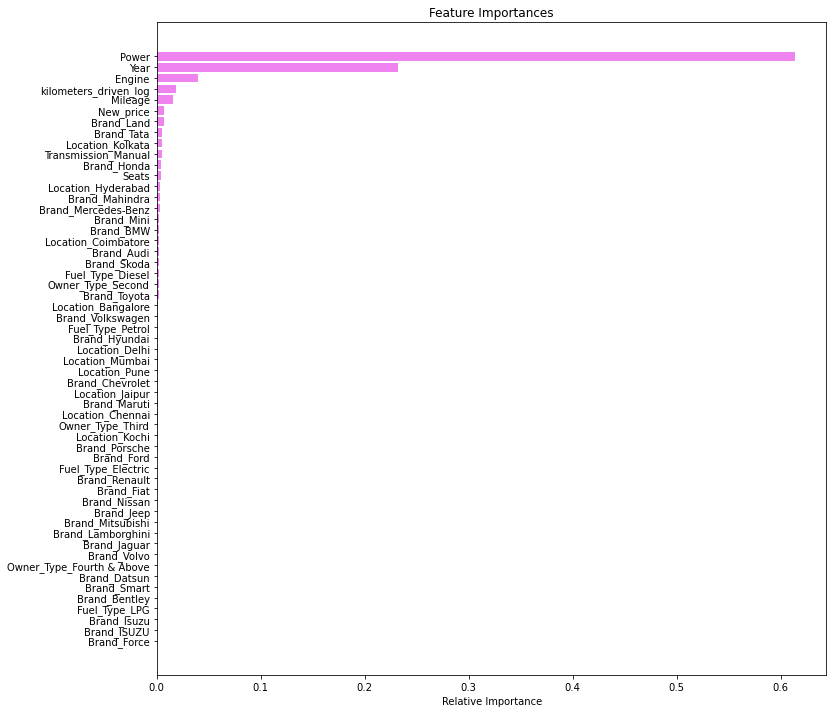

In [177]:
# Print important features similar to decision trees
importances = rf.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### **Observations and insights: **

The important features are consistent with the decision tree. The most important features are Power, Year, Engine, Kilometers Driven, and Mileage. 

### **Hyperparameter Tuning: Decision Tree**

In [178]:
from sklearn.metrics import mean_squared_error

# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from.
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring='neg_mean_absolute_error')
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train,y_train['price_log'])

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, random_state=1)

In [179]:
# Get score of the dtree_tuned
print('Training score: ', dtree_tuned.score(X_train, y_train['price_log']))
print('Validation score: ', dtree_tuned.score(X_test, y_test['price_log']))

Training score:  0.9331949332176682
Validation score:  0.889664462510739


#### **Observations and insights: **

We improved the R^2 score for the decision tree from 0.79 to 0.89 with this tuning. 

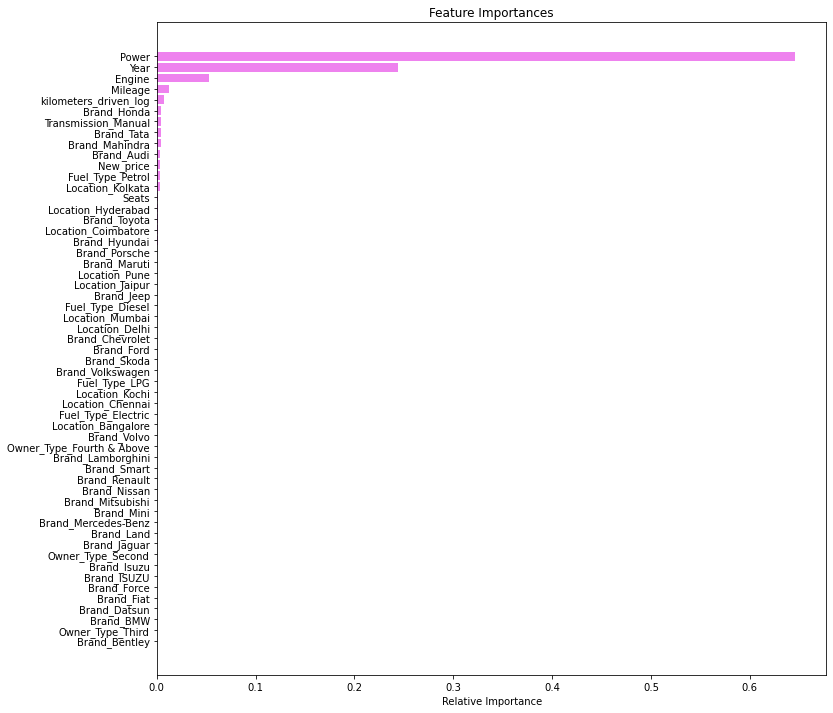

In [180]:
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### **Hyperparameter Tuning: Random Forest**

In [181]:
# Create a Randomforest regression model 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  "n_estimators": [100, 110, 120],
                "max_depth": [5, 6, 7],
                "max_features": [0.8, 0.9, 1]
             }

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='neg_mean_absolute_error')
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train,y_train['price_log'])


RandomForestRegressor(max_depth=7, max_features=0.8, n_estimators=120,
                      random_state=1)

In [182]:
# Get score of the model.
print('Training score: ', rf_tuned.score(X_train, y_train['price_log']))
print('Validation score: ', rf_tuned.score(X_test, y_test['price_log']))

Training score:  0.9333181725166206
Validation score:  0.9143719378720702


#### **Observations and insights: **

The tuned random forest model has a good fit and the best validation R^2 score. 

**Feature Importance**

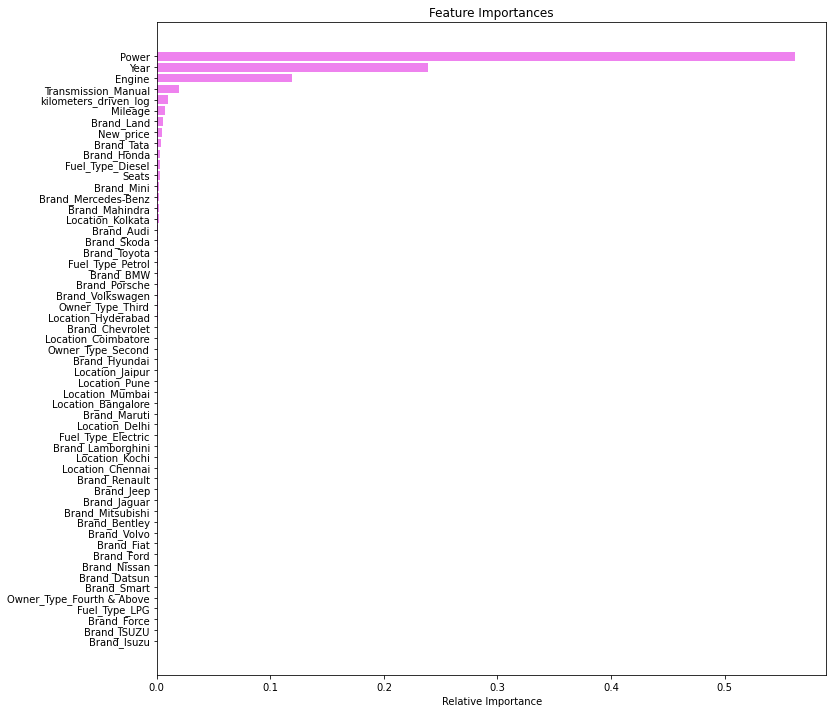

In [183]:
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Comparing Models


## Function to compute R^2 and RMSE for list of models 


In [184]:
# defining list of models ypu have trained
models = [lr,  ridge, dtree, dtree_tuned, rf, rf_tuned]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model, False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [151]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression', 'Ridge', 'Decision Tree','Decision Tree Tuned', 'Random Forest', 'Random Forest Tuned'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE':rmse_train,'Test_RMSE':rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.922076,0.928974,0.243160,0.234214
1,Ridge,0.921881,0.928653,0.243464,0.234744
2,Decision Tree,0.999990,0.880333,0.002712,0.304014
3,Decision Tree Tuned,0.933195,0.889664,0.225145,0.291920
4,Random Forest,0.990408,0.942968,0.085314,0.209878
5,Random Forest Tuned,0.933318,0.914372,0.224937,0.257166


### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

####**Key recommendations for implementation**: 
- What are some key recommendations to implement the solutions? What should the implementation roadmap look like? What further analysis needs to be done or what other associated problems need to be solved?